In [1]:
import wikipediaapi
import random

wiki_wiki = wikipediaapi.Wikipedia('en')

categories = {
    "Art and culture": ["Category:Culture", "Category:The arts", "Category:Performing arts", "Category:Visual arts"],
    "Food and Nutrition": ["Category:Nutrition", "Category:Food and drink"],
    "Renewable energy": ["Category:Renewable energy", "Category:Sustainable energy", "Category:Solar energy", "Category:Wind power", "Category:Hydropower"],
    "Sports and Entertainment": ["Category:Sports entertainment", "Category:Sports", "Category:Entertainment"]
}

def get_articles(categories, limit=100):
    articles = []

    for category in categories:
        cat_page = wiki_wiki.page(category)
        members = list(cat_page.categorymembers.values())
        random.shuffle(members)  # Shuffle the list to get a random selection of articles

        for member in members:
            if len(articles) >= limit:
                return articles[:limit]

            if member.ns == 0:  # This means it's an article, not a subcategory or file
                articles.append(member)
            elif member.ns == 14:  # This means it's a subcategory
                articles.extend(get_articles([member.title], limit=limit-len(articles)))

    return articles[:limit]


data = {}

for theme, categories in categories.items():
    articles = get_articles(categories)
    data[theme] = {}

    for article in articles:
        data[theme][article.title] = article.text

    print(f"Downloaded {len(data[theme])} articles for theme: {theme}")


Downloaded 78 articles for theme: Art and culture
Downloaded 98 articles for theme: Food and Nutrition
Downloaded 95 articles for theme: Renewable energy
Downloaded 99 articles for theme: Sports and Entertainment


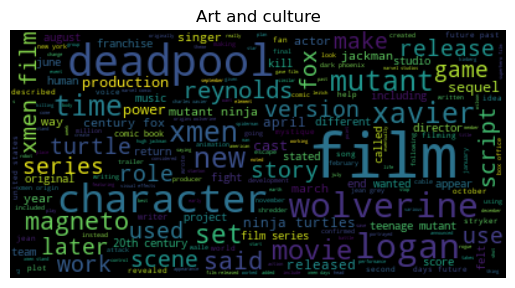

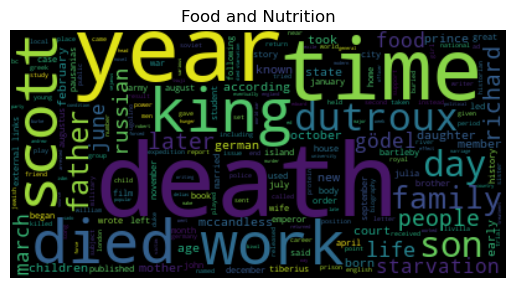

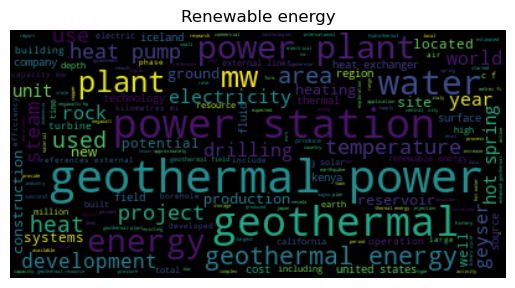

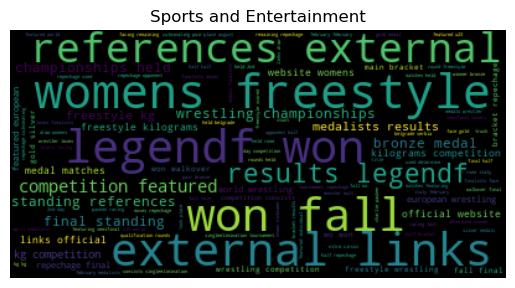

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction import _stop_words
import string

stopwords = set(_stop_words.ENGLISH_STOP_WORDS)

for theme, articles in data.items():
    text = " ".join(articles.values())
    # Remove punctuation and convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation)).lower()
    # Remove stop words
    text = " ".join(word for word in text.split() if word not in stopwords)

    wordcloud = WordCloud().generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(theme)
    plt.show()


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.cm as cm
import numpy as np
import plotly.graph_objects as go

vectorizer = TfidfVectorizer()

# Initialize lists for the corpus, labels, and article titles
corpus = []
labels = []
article_titles = []

# Populate the lists
for theme, articles in data.items():
    for article_title, article_text in articles.items():
        corpus.append(article_text)
        labels.append(theme)
        article_titles.append(article_title)

# Ensure the lists have the same length
assert len(corpus) == len(labels) == len(article_titles)

# Create a TF-IDF matrix from the corpus
X = vectorizer.fit_transform(corpus)

# Use t-SNE to reduce the TF-IDF matrix to two dimensions
X_embedded = TSNE(n_components=2).fit_transform(X.toarray())

# Ensure the number of rows in X_embedded matches the number of articles
assert X_embedded.shape[0] == len(corpus)

layout = go.Layout(
    title='t-SNE Visualization of Wikipedia Articles',
    hovermode='closest',
    autosize=False,
    width=1000,
    height=800
)

# Color map
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]

# Create a trace for each theme
traces = []
for i, theme in enumerate(data.keys()):
    indices = [j for j, x in enumerate(labels) if x == theme]

    x_coords = [X_embedded[i, 0] for i in indices]
    y_coords = [X_embedded[i, 1] for i in indices]

    traces.append(
        go.Scatter(
            x=x_coords,
            y=y_coords,
            mode='markers',
            name=theme,
            marker=dict(color=colors[i % len(colors)]),  # Use a color from the custom color map
            text=[article_titles[j] for j in indices],  # hover text
            hoverinfo='text'
        )
    )

fig = go.Figure(data=traces, layout=layout)

fig.show()



In [4]:
def print_wikipedia_article(article_title):
    # Create a wikipedia object
    wiki_wiki = wikipediaapi.Wikipedia('en')

    # Get the page
    page = wiki_wiki.page(article_title)

    # Check if the page exists
    if not page.exists():
        print("Article not found.")
        return

    # Print the content of the page
    print(page.text)

print_wikipedia_article('The Sylvia Center')

The Sylvia Center is an American, New York-based 501(c)(3) nonprofit organization that focuses on children's nutrition by teaching children and families about healthy eating habits and cooking.

History
The Sylvia Center was founded in 2006 Liz Neumark, CEO of the catering company Great Performances and advocate for sustainable agriculture. Named after Neumark's daughter, Sylvia, The Sylvia Center began as a pilot culinary program for children in New York City Housing Authority residents.The organization's programs include cooking classes, field trips to Katchkie Farm (an organic farm and a partner of The Sylvia Center), and gardening classes for children and families. The programs are offered in New York City through NYCHA community centers as well as Upstate New York (Kinderhook and Columbia County).


== References ==


We can see The Sylvia Center (Bottom left of the Art and Culture nodes) seems out of place, but this likely has to do with the topic being less related directly to food, and more about a non-profit doing nutrition related work. 

In [5]:
print_wikipedia_article('Saline Flush')

A saline flush is the method of clearing intravenous lines (IVs), central lines or arterial lines of any medicine or other perishable liquids to keep the lines (tubes) and entry area clean and sterile. Typically in flushing an intravenous cannula, a 5 - 10ml syringe of saline is emptied into the medication port of the cannula's connecting hub after insertion of the cannula. A 10ml syringe needs to be used to ensure correct pressure, whether you are giving 5ml or 10ml  Blood left in the cannula or hub can lead to clots forming and blocking the cannula. Flushing is required before a drip is connected to ensure that the IV is still patent.
Flushing is also used after medications are delivered by the medication port to ensure all the drug is delivered fully. If multiple medications are given through the same line, flushing can be used in between drugs to ensure that the medicines won't react. This is especially important if complex regimes of intravenous medication is used such as in chemo

Saline Flush as a topic is the top-most of the bottom Food and Nutrition grouping, grouped nearby several nodes that are not very directly related to food. Gastronomy as a topic is nearby, which is certainly food related, but may be more about technique and equipment than food.

In [6]:
print_wikipedia_article('Paul Tergat')

Paul Kibii Tergat (born 17 June 1969) is a Kenyan former professional long distance runner. He became the first Kenyan man to set the world record in the marathon in 2003, with a time of 2:04:55, and is regarded as one of the most accomplished long-distance runners of all time. Runnerworld called him the "Most comprehensive runner of all time".Towards the end of his career he concentrated exclusively on the marathon. Tergat set several world records and won many titles on the track, in cross country, and on the road. He lives and trains in Eldoret.

Early life
Paul Tergat was born on 17 June 1969 in Riwo, Baringo District, in Kenya's Rift Valley Province. He attended Riwo Primary school and later joined Kapkawa Boys High School. Unlike many athletes, Tergat realised his talent after graduating high school.

Career
Tergat won five straight IAAF World Cross Country Championships titles, 1995 to 1999, which was a record. Says Tergat, "Cross country is what I always liked most. It was my w

We can see Paul Tergat, who is referenced as a Food and Nutrition Node, is much close to the Sports and Entertainment nodes, which makes quite a lot of sense as he is a former professional cross country runner.

In [7]:
print_wikipedia_article('Elizabeth Nesbitt')

Elizabeth Nesbitt (April 15, 1897 – August 17, 1977), also known as Betty Nesbitt was an American children's librarian and a library science educator. She was known “internationally as an authority on children's literature”, and made “(s)trong contributions” to children's librarianship.

Early life and education
Elizabeth Nesbitt was born on April 15, 1897, in Northumberland, Pennsylvania, north of Harrisburg on the Susquehanna River, United States. After completing her studies in a private school, she earned the A.B. degree from the Goucher College for women, Baltimore in 1918. She also got another bachelor's degree in library science from Carnegie Library School in 1931. She went on to earn a master's degree in English from the University of Pittsburgh in 1935.

Career
In 1919 her family moved from Philadelphia to Pittsburgh. She briefly worked as a teacher in a private school in Pittsburgh. She later joined as an assistant at the Carnegie Library School of Pittsburgh. In 1948 she wa

Nesbit, while labeled as an Art and Culture node, is found near many Food and Nutrition nodes. It seems several well known librarians are grouped together here on the top-most part of food and nutrition, suggesting possible a sub-category from food and nutrition let to a bit of a tangent of information.